<a href="https://colab.research.google.com/github/ShivaniMareddy/Decision_Tree/blob/main/DecisionTree(bank_marketing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/bank_marketing_dataset.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
features = [
    'age', 'job', 'balance', 'loan',
    'contact', 'duration', 'campaign',
    'previous', 'poutcome'
]

target = 'deposit'

df = df[features + [target]]



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ['job', 'loan', 'contact', 'poutcome']

for col in categorical_cols:
    df.loc[:, col] = encoder.fit_transform(df[col])




In [ ]:
x = df.drop('deposit', axis=1)
y = df['deposit'].map({'yes':1, 'no':0})
print(x.head())
print(y.head())



   age job  balance loan contact  duration  campaign  previous poutcome
0   59   0     2343    0       2      1042         1         0        3
1   56   0       45    0       2      1467         1         0        3
2   41   9     1270    0       2      1389         1         0        3
3   55   7     2476    0       2       579         1         0        3
4   54   0      184    0       2       673         2         0        3
0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=42
)

model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
y_pred=model.predict(x_test)
print("Predictions:",y_pred)

Predictions: [0 1 1 ... 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.754590237348858
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1166
           1       0.70      0.86      0.77      1067

    accuracy                           0.75      2233
   macro avg       0.77      0.76      0.75      2233
weighted avg       0.77      0.75      0.75      2233



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[768 398]
 [150 917]]


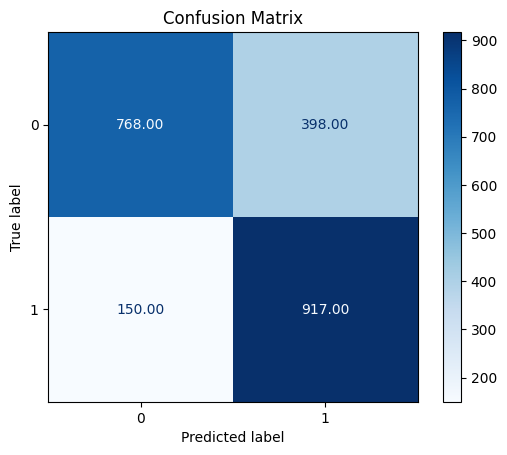

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues",values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

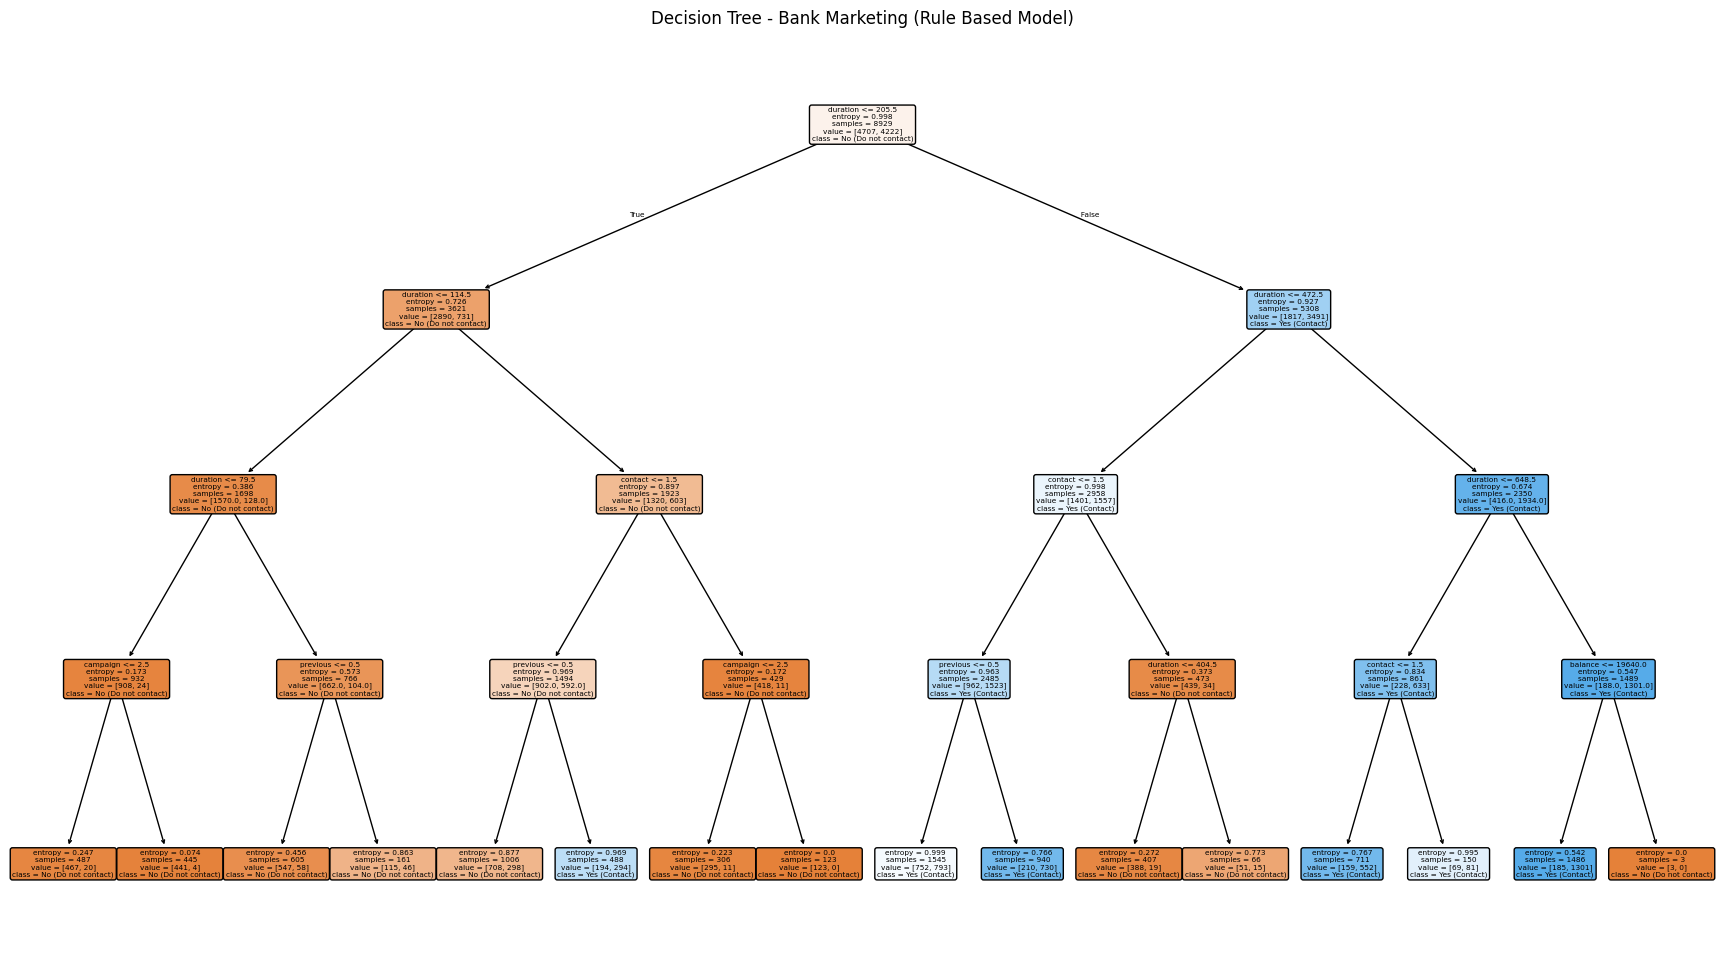

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = ['age', 'job', 'balance', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome']

plt.figure(figsize=(22, 12))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=['No (Do not contact)', 'Yes (Contact)'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree - Bank Marketing (Rule Based Model)")
plt.show()


8. Interpret the learned rules in simple business language

From your Decision Tree, typical rules look like:

If call duration is high and previous outcome was successful → customer is likely to subscribe
If call duration is low and balance is low → customer is not likely to subscribe

In simple words:

Customers who spend more time on call and had positive past interactions are more interested.

Customers with very short calls usually are not interested.

Customers with higher account balance are more likely to invest in term deposits.

Customers who already rejected earlier offers are less likely to subscribe.

👉 Business meaning:

“The more engaged the customer is in conversation and the better their past response, the higher the chance of subscription.”

9. Which customer attribute appears at the top of the decision logic? Why is it important?

In almost all Bank Marketing Decision Trees, the top attribute is:

👉 duration (call duration)
Why is it important?

Because:

Longer call = customer is listening + interested

Short call = customer is busy or not interested

Business Explanation:

“Call duration is the strongest indicator of customer interest. If a customer is willing to stay longer on the call, they are more likely to subscribe to the term deposit.”

10. Analyze model behavior
a) What happens if the model becomes too deep?

If the tree becomes too deep:

It learns very specific rules

It starts memorizing data instead of learning patterns

This leads to overfitting

In simple words:

“The model becomes too complicated and performs well only on old data but poorly on new customers.”

b) How does limiting depth affect decision quality?

When we limit depth (e.g., max_depth = 3 or 4):

Rules become simple and clean

Model generalizes better

Easy for management to understand

In simple words:

“Limiting the depth keeps the rules simple, meaningful, and reliable for real-world decisions.”

11. Based on your analysis
a) Would you recommend this model to the bank?
✅ YES, absolutely.
Reason:

Clear rules

Easy to implement

Reduces unnecessary calls

Saves cost & time

Business Line:

“Yes, I would recommend this model because it helps the bank target only interested customers, reducing call cost and improving campaign efficiency.”

b) Why is this approach better than a ‘black-box’ model?

Black-box models = Neural Networks, complex ML models
Problem:

No explanation

Management cannot trust decisions

Cannot convert to business rules

Decision Tree advantage:

Transparent

Explainable

Rule-based

Trustworthy

Simple Explanation:

“Decision Trees are better than black-box models because the bank can clearly see why a customer is selected or rejected. This builds trust and allows easy implementation as business rules.”